In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [4]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np

In [6]:
data_file=('Cardiac_Outcomes.xlsx')
all_sheets=pd.read_excel(data_file,sheet_name=None)
#to access sheet by name in excel
Hospital_data=all_sheets['Hospitalization_Discharge']
Cardiac_data=all_sheets['CardiacComplications']
Response_data=all_sheets['Responsivenes']
Patient_data=all_sheets['PatientHistory']
lab_data=all_sheets['Labs']
Demography_data=all_sheets['Demography']
Patientpre_data=all_sheets['Patient_Precriptions']


In [7]:
print(data_file)

Cardiac_Outcomes.xlsx


In [8]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Q 16 Create a pivot table with myocardial_infarction, congestive_heart_failure,peripheral_vascular_disease as rows and average Uric Acid and BMI as columns, using melt functions

In [33]:
merged_T1 = pd.merge( Cardiac_data,lab_data,on='inpatient_number')
merged_T2=pd.merge( merged_T1,Demography_data,on='inpatient_number')
df = pd.melt(merged_T2, id_vars=['uric_acid','BMI'],value_vars=['myocardial_infarction','congestive_heart_failure','peripheral_vascular_disease'],var_name='Complication', value_name='result')
Pivottable = df.groupby('Complication')[['uric_acid', 'BMI']].mean()
print(Pivottable)

                             uric_acid        BMI
Complication                                     
congestive_heart_failure     483.01864  21.791398
myocardial_infarction        483.01864  21.791398
peripheral_vascular_disease  483.01864  21.791398


# Q 17 Using arrays and loops find the number of patients who were Admitted in the month of November

In [16]:
from datetime import datetime

get_admission_dates = Hospital_data['Admission_date']

nov_cnt = 0

for x in get_admission_dates:
       
    if x.month == 11 :
        nov_cnt += 1  

print(nov_cnt) 


195


In [9]:
import seaborn as sns

# Q 18 Create a heatmap on any columns of your choice including at least 1 lab value

<Axes: >

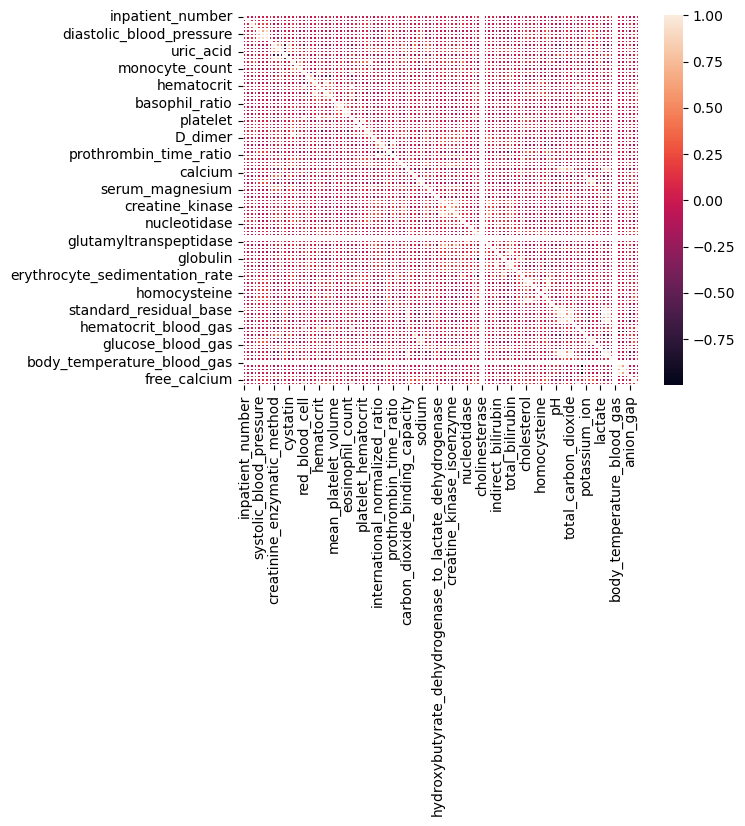

In [36]:
df=pd.DataFrame(lab_data)
sns.heatmap(df.corr(),cbar=True,linewidths=0.2)

# 18 different approach

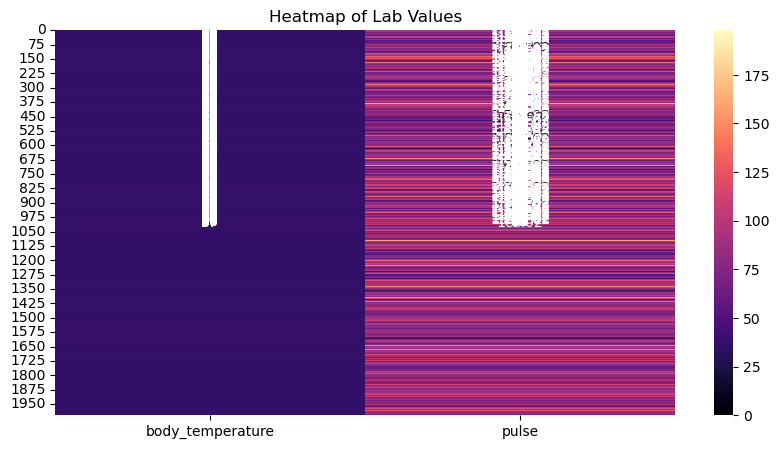

In [15]:
import matplotlib.pyplot as plt
df=pd.DataFrame(lab_data)
heatmap_data = df[['body_temperature', 'pulse']]
plt.figure(figsize=(10,5))
heatmap = sns.heatmap(heatmap_data, annot=True, cmap='magma')
plt.title('Heatmap of Lab Values')
plt.show()

# Q 19 Create a bar chart by making list on Avg BMI and occupation column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method  
 

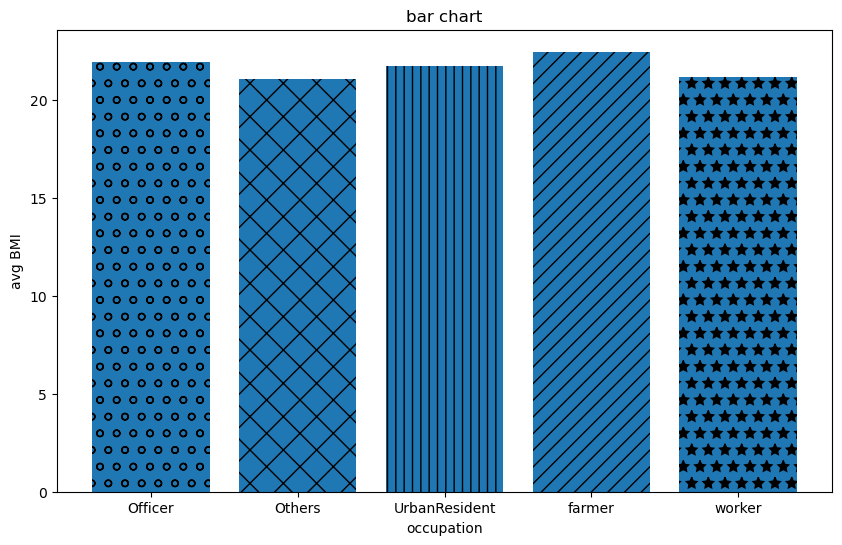

In [34]:
df1=pd.DataFrame(Demography_data)
avg_bmi = df1.groupby(['occupation'])['BMI'].mean().reset_index()
average_bmi = df1['BMI'].mean()

plt.figure(figsize=(10, 6))
bars = plt.bar(avg_bmi['occupation'],avg_bmi ['BMI'])


hatches = ['o', 'x', '||', '//', '*']
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

plt.xlabel('occupation')
plt.ylabel('avg BMI')
plt.title('bar chart')
plt.show()

# Q 20 You are given three integers x,y,z representing the dimensions of a cuboid along with an integer n .Print a list of all possible coordinates given by(i,j,k) on a 3D grid where the sum of i,j,k is not equal to n. x=1, y=1, z=2, n=3


In [37]:
x = int(input())
y = int(input())
z = int(input())
n = int(input())
arr=[[i,j,k] for i in range(x+1) for j in range(y+1) for k in range(z+1) if i+j+k !=n]
print(arr)

1
1
2
3
[[0, 0, 0], [0, 0, 1], [0, 0, 2], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 2]]


# Q 41Plot the time series of Admission dates with count of patients. The X-Axis should be for every 5 months¶

Text(0.5, 1.0, 'Patient Count Every 5 Months')

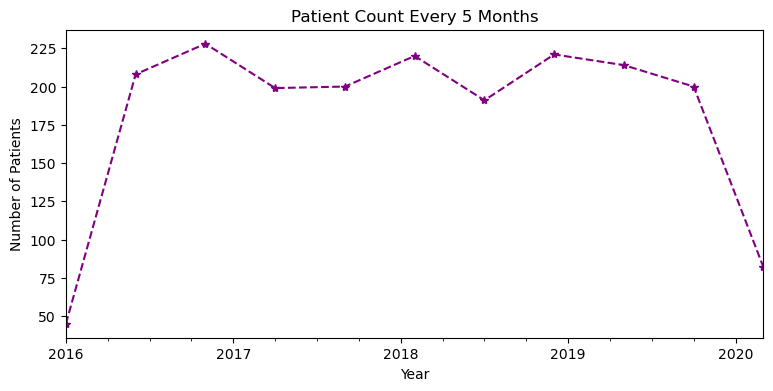

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
Hospital_data=all_sheets['Hospitalization_Discharge']
Hospital_data['Admission_date']=pd.to_datetime(Hospital_data['Admission_date'])
adm_cnt = Hospital_data.resample('5M', on='Admission_date').size()

plt.figure(figsize=(9, 4))
adm_cnt.plot(marker='*', linestyle='--',color='purple')
plt.xlabel('Year')
plt.ylabel('Number of Patients')
plt.title('Patient Count Every 5 Months')



# Q 42 np.arange(1,21).reshape(4,5), find array slicing to get the elements 1,2,8,19. When the value is less than 9, print as 0,else print 1

In [35]:
arr = np.arange(1,21).reshape(4,5)

elements=[arr[0,0],arr[0,1],arr[1,2],arr[3,3]]

print("Original array:")
print(arr)
print("\nElements 1, 2, 8, and 19:")

for x in elements :
    if x < 9 :
       print(x , "  : ","0")
    else:
       print(x , " :  " "1")


Original array:
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]]

Elements 1, 2, 8, and 19:
1   :  0
2   :  0
8   :  0
19  :  1


# Q 43 Give Distribution chart of max Killip_grade

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


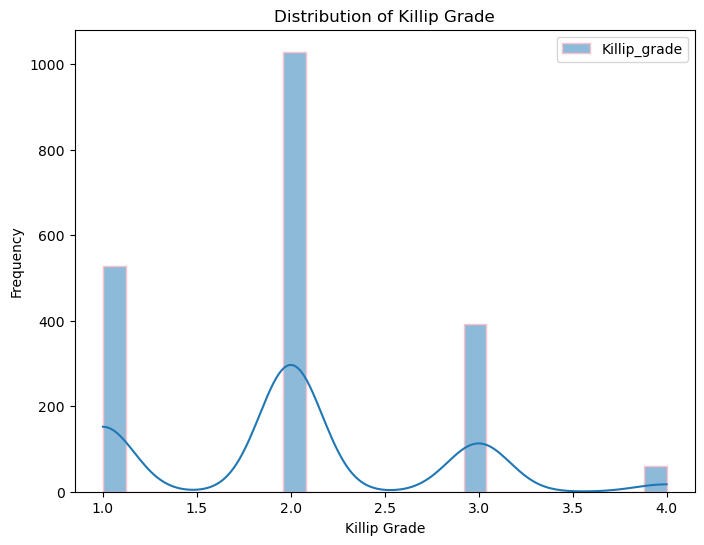

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data_file=("Cardiac_Outcomes.xlsx ")
all_sheets=pd.read_excel(data_file,sheet_name=None)
CardiacComplications = all_sheets['CardiacComplications']

grade =CardiacComplications['Killip_grade']
df = pd.DataFrame(grade)

plt.figure(figsize=(8, 6))
a=sns.histplot(data=df, bins=25, kde=True,  edgecolor='pink')
plt.xlabel('Killip Grade')
plt.ylabel('Frequency')
plt.title('Distribution of Killip Grade')
plt.show()

#As per my analysis the highest Killip_grade is 2.0 where it shows the peak with min 1.5 and max 2.5.

# Q 44 Based on Q26 and 27 display all demographic details of patients who are born in year 1945

In [27]:
def Random_Age(age):
 return pd.Series(age.split("-", 1))
Demography_data[['Age1', 'Age2']] = Demography_data['ageCat'].apply(Random_Age)  
Demography_data['Age'] = [np.random.randint(s, e) for s,e in zip(Demography_data['Age1'], Demography_data['Age2'])]
del Demography_data['Age1']
del Demography_data['Age2']
current=pd.Timestamp.now().year
Demography_data['year_of_birth']=current-Demography_data['Age']
#Demography_data
patients=Demography_data[Demography_data['year_of_birth']==1945]
print(patients)

      inpatient_number  gender  weight  height        BMI     occupation  \
5               823318  Female    45.0    1.56  18.491124  UrbanResident   
12              802296    Male    70.0    1.72  23.661439  UrbanResident   
40              760822  Female    43.0    1.48  19.631118  UrbanResident   
56              736105  Female    45.0    1.60  17.578125         Others   
69              759361  Female    50.0    1.55  20.811655  UrbanResident   
...                ...     ...     ...     ...        ...            ...   
1938            818458    Male    58.0    1.60  22.656250  UrbanResident   
1973            792460  Female    50.0    1.50  22.222222  UrbanResident   
1977            732617    Male    50.0    1.60  19.531250  UrbanResident   
1983            852097  Female    47.0    1.53  20.077748  UrbanResident   
2004            734280  Female    50.0    1.55  20.811655  UrbanResident   

     ageCat  Age  year_of_birth  
5     79-89   79           1945  
12    79-89   79   

# Q 45 Create a dataframe with date and time as columns, where the values are the admission time

In [42]:
import pandas as pd
data_file = 'Cardiac_Outcomes.xlsx'
all_sheets = pd.read_excel(data_file, sheet_name=None)
Hospital_data = all_sheets['Hospitalization_Discharge']
Hospital_data['Admission_date'] = pd.to_datetime(Hospital_data['Admission_date'])
Hospital_data['visit'] = pd.to_datetime(Hospital_data['dischargeDay'])

print(Hospital_data[['Admission_date', 'dischargeDay']])

     Admission_date  dischargeDay
0        2017-01-24            11
1        2017-05-05             8
2        2016-11-18             5
3        2017-10-02            11
4        2019-11-17             5
...             ...           ...
2003     2016-02-07             5
2004     2017-03-29             8
2005     2018-01-22            14
2006     2019-11-27             1
2007     2017-02-17             6

[2008 rows x 2 columns]


# Q 69 Get the list of patient ID's which are not there in prescriptions but in demographics

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
data_file=("Cardiac_Outcomes.xlsx ")
all_sheets=pd.read_excel(data_file,sheet_name=None)
Demography = all_sheets['Demography']
Patient_Precriptions= all_sheets['Patient_Precriptions']
df1 = pd.DataFrame(Demography)
df2=pd.DataFrame(Patient_Precriptions)
patientcnt = df1[~df1['inpatient_number'].isin(df2['inpatient_number'])]['inpatient_number'].tolist()
patientcnt

[789308]

# Q 70 On average, what is the most frequent weekday of admission?

In [46]:
data_file=('Cardiac_Outcomes.xlsx')
all_sheets=pd.read_excel(data_file,sheet_name=None)
Hospital_data=all_sheets['Hospitalization_Discharge']
df=pd.to_datetime(Hospital_data['Admission_date'])
weekdaycnt =Hospital_data ['Admission_date'].dt.dayofweek.value_counts()
weekdaycnt

day = df.dt.day_name().value_counts()
Freq_weekday=day.idxmax()

print(weekdaycnt)
print("\nost frequent weekaday of admission :" ,Freq_weekday)


Admission_date
0    308
6    305
2    294
3    289
4    276
5    270
1    266
Name: count, dtype: int64

most frequent weekaday of admission : Monday


# Q 71 Which year had the maximum admissions?

In [26]:
admission_data=Hospital_data.groupby(Hospital_data['Admission_date'].dt.year)['inpatient_number'].count().sort_values()
print('N\Maximun addmission year in:',admission_data.tail(1))

N\Maximun addmission year in: Admission_date
2016    518
Name: inpatient_number, dtype: int64


# Q 72 What % of the dataset is male vs female?

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
data_file=("Cardiac_Outcomes.xlsx ")

all_sheets=pd.read_excel(data_file,sheet_name=None)
Demography = all_sheets['Demography']

df=pd.DataFrame(Demography)
Total=len(df)
print("Total gender count:",Total)


ttlgender=df['gender'].value_counts()
print(ttlgender)


Male_ratio= (ttlgender['Male']/Total)*100
Female_ratio=(ttlgender['Female']/Total)*100

print("male:" , Male_ratio)
print("female:" , Female_ratio)

print("male: {:.2f}%".format(Male_ratio))
print("female: {:.2f}%".format(Female_ratio))

Total gender count: 2008
gender
Female    1163
Male       845
Name: count, dtype: int64
male: 42.08167330677291
female: 57.918326693227094
male: 42.08%
female: 57.92%


# Q 73 Which patient in the youngest age category weighs the most?

In [20]:
import pandas as pd
data_file=("Cardiac_Outcomes.xlsx ")

all_sheets=pd.read_excel(data_file,sheet_name=None)
Demography = all_sheets['Demography']

most_weight_patient = Demography[Demography['ageCat'] == Demography['ageCat'].min()].nlargest(1, 'weight')
most_weight_patient

,inpatient_number,gender,weight,height,BMI,occupation,ageCat
1092,831184,Female,82.5,1.62,31.435757,UrbanResident,21-29


# Q 74 Which adm ward had the lowest rate of Outcome Death?

In [17]:
dead_data = Hospital_data[Hospital_data['outcome_during_hospitalization'] == 'Dead']
patient_nos = dead_data['inpatient_number']
print(dead_data['admission_ward'].value_counts().sort_values())

print(len(dead_data))

admission_ward
ICU            1
GeneralWard    1
Others         1
Cardiology     8
Name: count, dtype: int64
11


# EXTRA ANALYSIS


# Q Using cross tab function, find patient more prone to obesity?

In [53]:
data_file = 'Cardiac_Outcomes.xlsx'
all_sheets = pd.read_excel(data_file, sheet_name=None)
Demography = all_sheets['Demography']
pivot_table=pd.crosstab(index=Demography.inpatient_number, columns=Demography.ageCat,values=Demography.BMI,aggfunc='max')
pivot_table['max_BMI'] = pivot_table.max(axis=1)
pivot_table
most_obese_inpatient = pivot_table['max_BMI'].idxmax()

most_obese_inpatient
Demography_data[Demography_data['inpatient_number']==most_obese_inpatient]

,inpatient_number,gender,weight,height,BMI,occupation,ageCat,Age,year_of_birth
319,815731,Male,49.5,0.35,404.081633,farmer,49-59,56,1968


# Q To find the outlier, create a scatter plot using body against each patient

<function matplotlib.pyplot.show(close=None, block=None)>

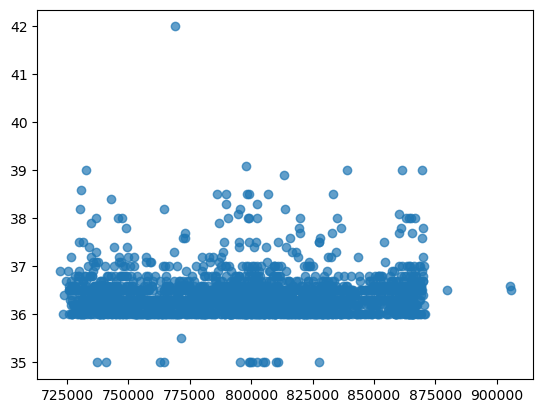

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data_file = 'Cardiac_Outcomes.xlsx'
all_sheets = pd.read_excel(data_file, sheet_name=None)
Labs = all_sheets['Labs']
x=Labs['inpatient_number']
y=Labs['body_temperature']

Result=plt.scatter(x, y, alpha=0.7)

plt.show